In [107]:
import torch
import torch_geometric
import networkx as nx
from torch_geometric.utils.convert import from_networkx

# Batching

In [108]:
graph_list = [torch_geometric.utils.from_networkx(nx.generators.grid_2d_graph(i, i)) for i in range(2, 5)]

In [109]:
graph_batch = torch_geometric.data.Batch.from_data_list(graph_list)

In [110]:
graph_batch.ptr

tensor([ 0,  4, 13, 29])

# edge index to adj

In [111]:
def edge_index_to_adj(edge_index: torch.Tensor, num_nodes: int):
    adj = torch.zeros((num_nodes, num_nodes))
    adj[edge_index[0, :], edge_index[1, :]] = 1
    return adj

In [112]:
G = nx.generators.grid_graph(dim=(4,))

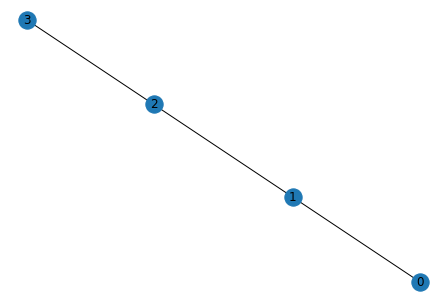

In [113]:
nx.draw(G, with_labels=True)

In [114]:
data = from_networkx(G)

In [115]:
data.edge_index.shape

torch.Size([2, 6])

In [116]:
edge_index_to_adj(data.edge_index, data.num_nodes)

tensor([[0., 1., 0., 0.],
        [1., 0., 1., 0.],
        [0., 1., 0., 1.],
        [0., 0., 1., 0.]])